# Praktikum 1

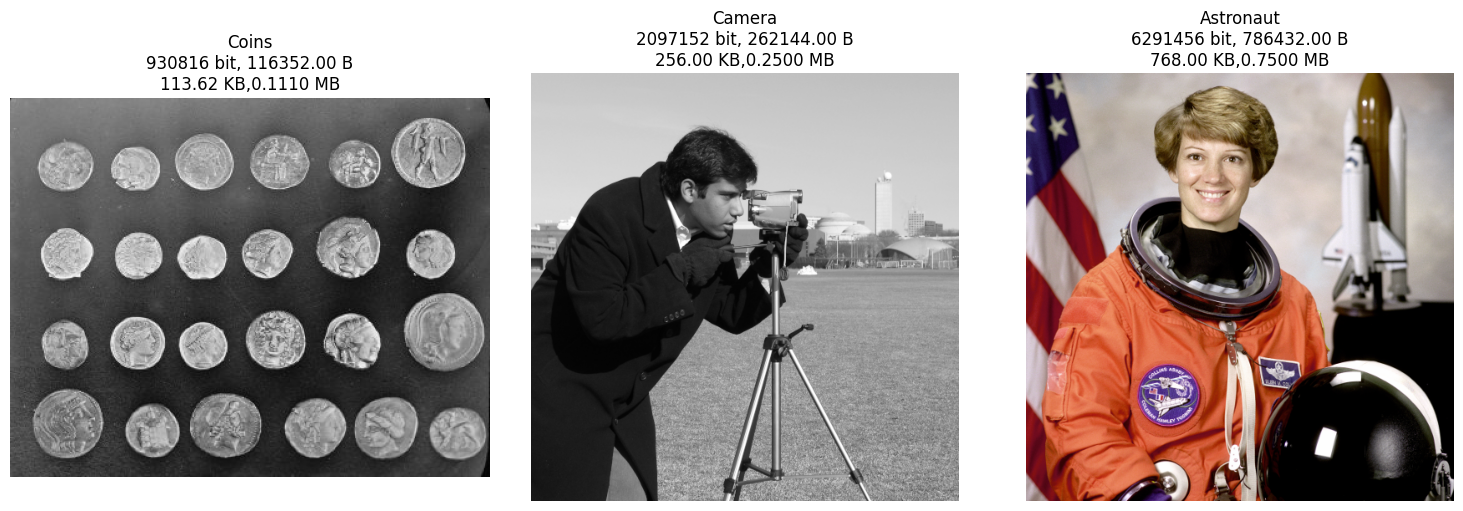

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

# Contoh gambar dari scikit-image
gambar_coins = data.coins()
gambar_camera = data.camera()
gambar_astronaut = data.astronaut()

# Fungsi untuk menghitung ukuran gambar dalam bit, byte, KB, MB
def hitung_ukuran(image):
    bit_per_pixel = 8 if len(image.shape) == 2 else 24 # Grayscale = 8 bit, RGB = 24 bit
    total_pixels = image.shape[0] * image.shape[1]
    total_bits = total_pixels * bit_per_pixel
    total_bytes = total_bits / 8
    total_kb = total_bytes / 1024
    total_mb = total_kb / 1024
    return total_bits, total_bytes, total_kb, total_mb

# Menyusun gambar dan ukurannya dalam satu baris
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Daftar gambar dan nama
gambar_list = [gambar_coins, gambar_camera, gambar_astronaut]
nama_list = ["Coins", "Camera", "Astronaut"]

for ax, img, nama in zip(axes, gambar_list, nama_list):
  bits, bytes_, kb, mb = hitung_ukuran(img)
  ax.imshow(img, cmap='gray' if len(img.shape) == 2 else None)
  ax.set_title(f"{nama}\n{bits} bit, {bytes_:.2f} B\n{kb:.2f} KB,{mb:.4f} MB")
  ax.axis('off')

plt.tight_layout()
plt.show()


# Praktikum 2

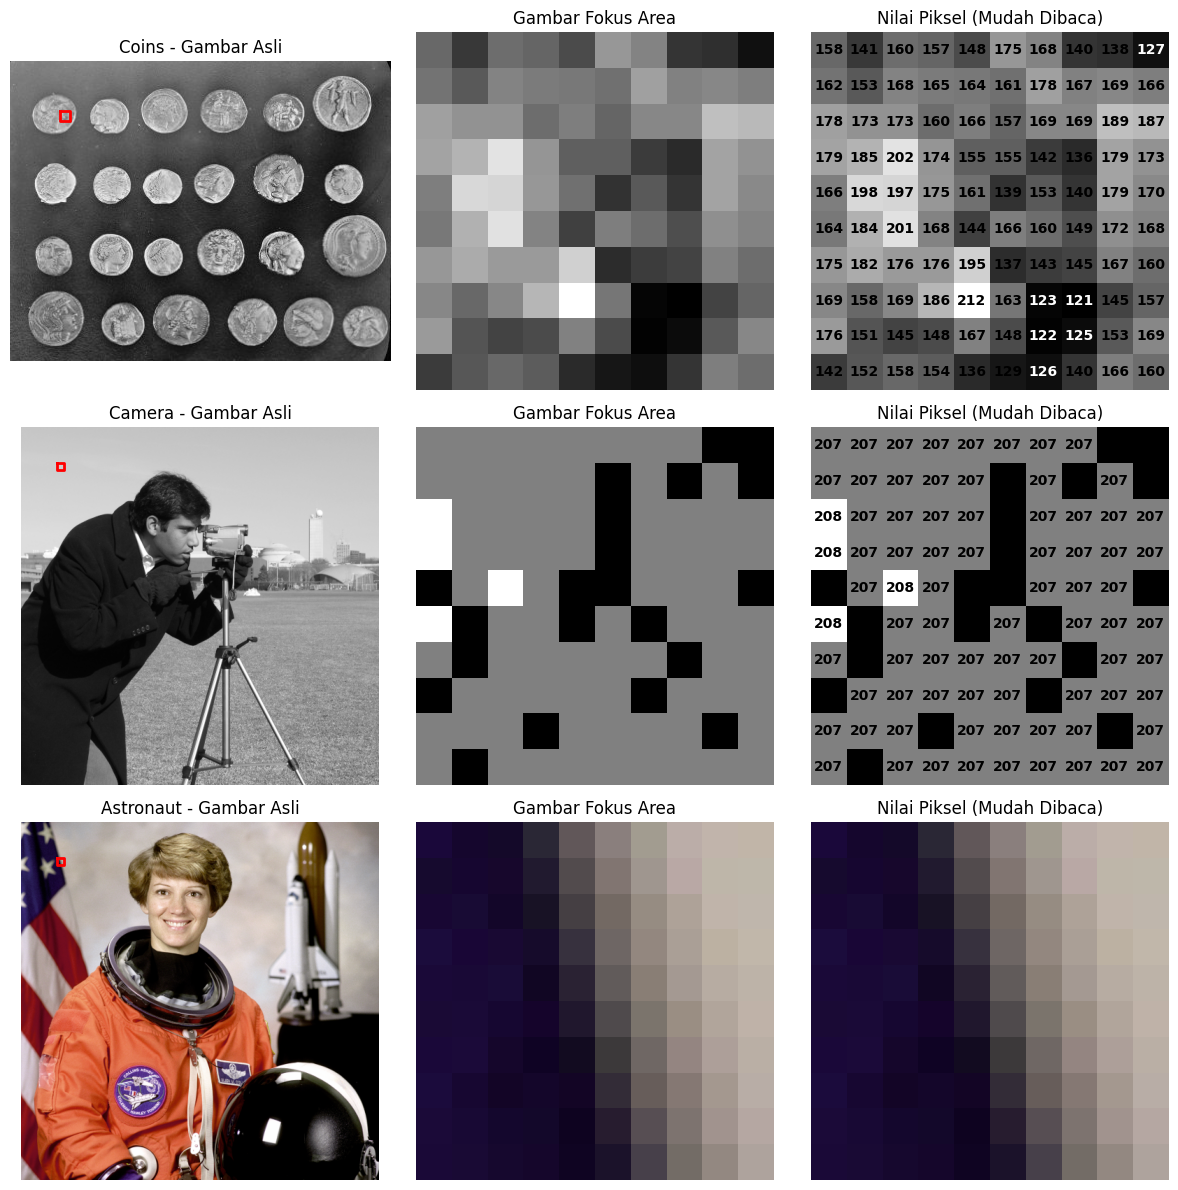

In [3]:
# Menampilkan bagaimana citra digital tersusun dari piksel dengan area fokus yang ditandai

fig, axes = plt.subplots(3, 3, figsize=(12, 12))

# List gambar dan nama
gambar_list = [gambar_coins, gambar_camera, gambar_astronaut]
nama_list = ["Coins", "Camera", "Astronaut"]

# Koordinat area kecil yang di-zoom
x_start, x_end = 50, 60
y_start, y_end = 50, 60

for i, (img, nama) in enumerate(zip(gambar_list, nama_list)):
  # Gambar asli
  axes[i, 0].imshow(img, cmap='gray' if len(img.shape) == 2 else None)
  axes[i, 0].set_title(f"{nama} - Gambar Asli")
  axes[i, 0].axis('off')

  # Tambahkan kotak merah untuk menunjukkan area yang difokuskan
  rect_x = [x_start, x_end, x_end, x_start, x_start]
  rect_y = [y_start, y_start, y_end, y_end, y_start]
  axes[i, 0].plot(rect_x, rect_y, color="red", linewidth=2)

  # Gambar fokus area
  zoomed_img = img[y_start:y_end, x_start:x_end]
  axes[i, 1].imshow(zoomed_img, cmap='gray' if len(img.shape) == 2 else None, interpolation='nearest')
  axes[i, 1].set_title("Gambar Fokus Area")
  axes[i, 1].axis('off')

  # Menampilkan nilai piksel dalam area yang di-zoom (khusus RGB, gunakan rata-rata kanal)
  axes[i, 2].imshow(zoomed_img, cmap='gray' if len(img.shape) == 2 else None, interpolation='nearest')

  for y in range(zoomed_img.shape[0]):
    for x in range(zoomed_img.shape[1]):
      if len(img.shape) == 3: # Jika RGB, ambil nilai rata-rata piksel untuk tampilan angka
        pixel_value = np.mean(zoomed_img[y, x]).astype(int)
      else:
        pixel_value = zoomed_img[y, x]

        # Pilih warna teks agar mudah dibaca di latar belakang
        text_color = "white" if pixel_value < 128 else "black"
        axes[i, 2].text(x, y, str(pixel_value), color=text_color, ha='center', va='center', fontsize=10, fontweight='bold')

  axes[i, 2].set_title("Nilai Piksel (Mudah Dibaca)")
  axes[i, 2].axis('off')

plt.tight_layout()
plt.show()


# Praktikum 3


=== Coins ===
Tipe Data: <class 'numpy.ndarray'>
Dimensi: (303, 384)
Tipe Nilai Piksel: uint8
Contoh nilai piksel (5x5 pertama):
[[ 47 123 133 129 137]
 [ 93 144 145 143 145]
 [126 147 143 147 145]
 [131 136 133 139 136]
 [131 133 134 135 129]]

=== Camera ===
Tipe Data: <class 'numpy.ndarray'>
Dimensi: (512, 512)
Tipe Nilai Piksel: uint8
Contoh nilai piksel (5x5 pertama):
[[200 200 200 200 199]
 [200 199 199 200 199]
 [199 199 199 200 200]
 [200 200 199 199 199]
 [200 200 200 200 199]]

=== Astronaut ===
Tipe Data: <class 'numpy.ndarray'>
Dimensi: (512, 512, 3)
Tipe Nilai Piksel: uint8
Contoh nilai piksel (5x5 pertama):
[[[154 147 151]
  [109 103 124]
  [ 63  58 102]
  [ 54  51  98]
  [ 76  76 106]]

 [[177 171 171]
  [144 141 143]
  [113 114 124]
  [106 107 120]
  [128 128 131]]

 [[201 194 193]
  [182 178 175]
  [168 165 164]
  [159 157 157]
  [167 165 161]]

 [[220 213 210]
  [214 206 206]
  [202 198 196]
  [197 191 193]
  [200 194 196]]

 [[232 223 223]
  [226 220 215]
  [221 215

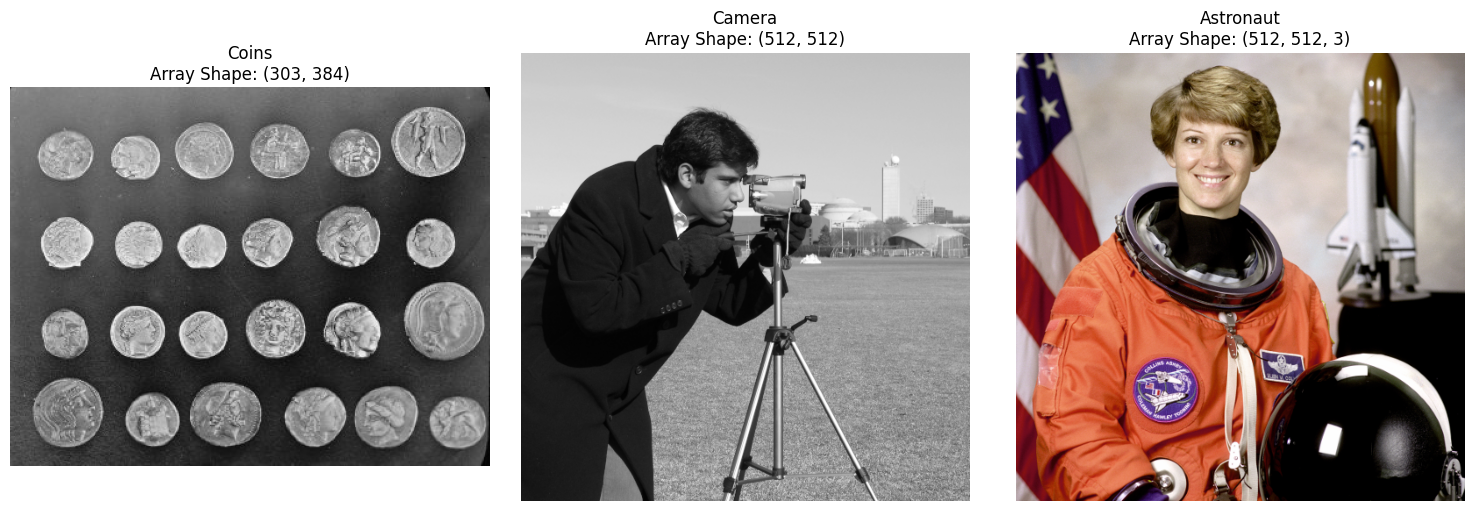

In [4]:
# Menjelaskan bagaimana citra disimpan dalam array NumPy 02:
import numpy as np

# Memuat gambar dari scikit-image 06: gambar_coins = data.coins()
gambar_camera = data.camera()
gambar_astronaut = data.astronaut()

# Fungsi untuk menampilkan informasi array NumPy dari gambar
def info_array_numpy(image, nama):
  print(f"\n=== {nama} ===")
  print(f"Tipe Data: {type(image)}") # Harusnya <class 'numpy.ndarray'>
  print(f"Dimensi: {image.shape}") # Menampilkan dimesi gambar (height, width, channels jika RGB)
  print(f"Tipe Nilai Piksel: {image.dtype}") # Menampilkan tipe data dalam array (uint8)

  # Menampilkan sebagian kecil dari array (5x5 piksel pertama)
  print("Contoh nilai piksel (5x5 pertama):")
  print(image[:5, :5] if len(image.shape) == 2 else image[:5, :5, :])

# Menampilkan informasi setiap gambar
info_array_numpy(gambar_coins, "Coins")
info_array_numpy(gambar_camera, "Camera")
info_array_numpy(gambar_astronaut, "Astronaut")

# Visualisasi bagaimana array NumPy mewakili citra
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

gambar_list = [gambar_coins, gambar_camera, gambar_astronaut]
nama_list = ["Coins", "Camera", "Astronaut"]

for ax, img, nama in zip(axes, gambar_list, nama_list):
  ax.imshow(img, cmap='gray' if len(img.shape) == 2 else None)
  ax.set_title(f"{nama}\nArray Shape: {img.shape}")
  ax.axis('off')

plt.tight_layout()
plt.show()


# Praktikum 4

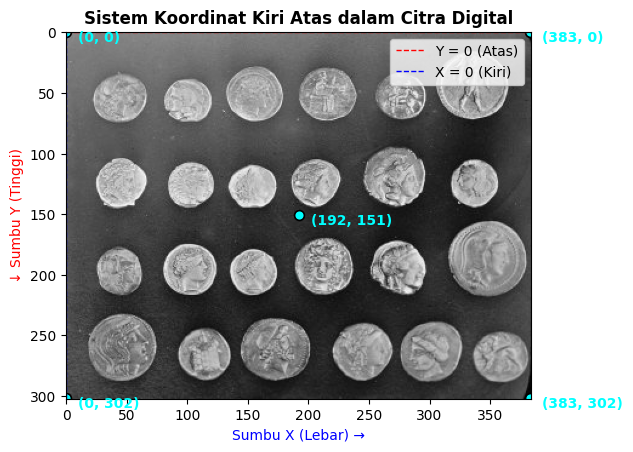

In [5]:
# Menjelaskan sistem koordinat kiri atas dalam citra digital dengan warna anotasi yang lebih kontras

# Pilih salah satu gambar untuk contoh koordinat
gambar_sample = data.coins()

# Ukuran gambar
height, width = gambar_sample.shape

# Buat plot
fig, ax = plt.subplots(figsize=(6, 6))

# Tampilkan gambar
ax.imshow(gambar_sample, cmap='gray')

# Tambahkan anotasi sumbu koordinat
ax.set_title("Sistem Koordinat Kiri Atas dalam Citra Digital", fontsize=12, fontweight="bold")
ax.set_xlabel("Sumbu X (Lebar) →", fontsize=10, color="blue")
ax.set_ylabel("↓ Sumbu Y (Tinggi)", fontsize=10, color="red")

# Tambahkan garis koordinat utama
ax.axhline(y=0, color='red', linestyle='--', linewidth=1, label="Y = 0 (Atas)")
ax.axvline(x=0, color='blue', linestyle='--', linewidth=1, label="X = 0 (Kiri)")

# Tambahkan beberapa titik koordinat penting dengan warna kontras (cyan)
koordinat_titik = [(0, 0), (width-1, 0), (0, height-1), (width-1, height-1), (width//2, height//2)]
for x, y in koordinat_titik:
  ax.scatter(x, y, color='cyan', s=50, edgecolors='black', linewidth=1.2) # Titik dengan outline hitam
  ax.text(x + 10, y + 10, f"({x}, {y})", color="cyan", fontsize=10, fontweight="bold", ha="left", va="bottom")

# Tambahkan legenda
ax.legend(loc="upper right")

plt.show()


# Praktikum 5

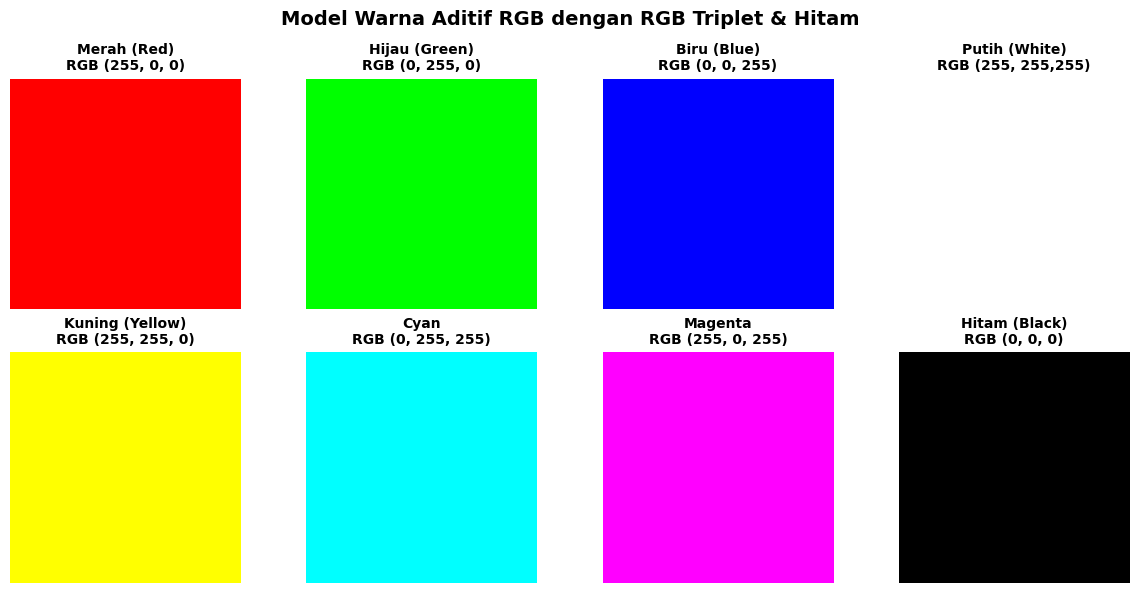

In [6]:
# Menjelaskan model warna aditif RGB dalam citra digital dengan RGB Triplet dan warna hitam

# Membuat tiga kanal warna utama dalam model RGB
red_channel = np.zeros((100, 100, 3), dtype=np.uint8)
green_channel = np.zeros((100, 100, 3), dtype=np.uint8)
blue_channel = np.zeros((100, 100, 3), dtype=np.uint8)

# Mengatur warna merah, hijau, dan biru murni
red_channel[:, :, 0] = 255 # (255, 0, 0) - Merah
green_channel[:, :, 1] = 255 # (0, 255, 0) - Hijau
blue_channel[:, :, 2] = 255 # (0, 0, 255) - Biru

# Membuat kombinasi warna dari RGB
yellow = red_channel + green_channel # (255, 255, 0) - Kuning
cyan = green_channel + blue_channel # (0, 255, 255) - Cyan
magenta = red_channel + blue_channel # (255, 0, 255) - Magenta
white = red_channel + green_channel + blue_channel # (255, 255, 255) - Putih
black = np.zeros((100, 100, 3), dtype=np.uint8) # (0, 0, 0) - Hitam

# Menampilkan hasil dengan RGB Triplet
fig, axes = plt.subplots(2, 4, figsize=(12, 6))

# List gambar, nama warna, dan RGB triplet
color_list = [red_channel, green_channel, blue_channel, white, yellow, cyan, magenta, black]
color_names = ["Merah (Red)", "Hijau (Green)", "Biru (Blue)", "Putih (White)", "Kuning (Yellow)", "Cyan", "Magenta", "Hitam (Black)"]
rgb_values = ["(255, 0, 0)", "(0, 255, 0)", "(0, 0, 255)", "(255, 255,255)", "(255, 255, 0)", "(0, 255, 255)", "(255, 0, 255)", "(0, 0, 0)"]

# Plot warna primer, hasil campuran, dan hitam dengan RGB triplet
for ax, color, name, rgb in zip(axes.flat, color_list, color_names, rgb_values):
  ax.imshow(color)
  ax.set_title(f"{name}\nRGB {rgb}", fontsize=10, fontweight="bold")
  ax.axis('off')

plt.suptitle("Model Warna Aditif RGB dengan RGB Triplet & Hitam", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()


# Praktikum 6

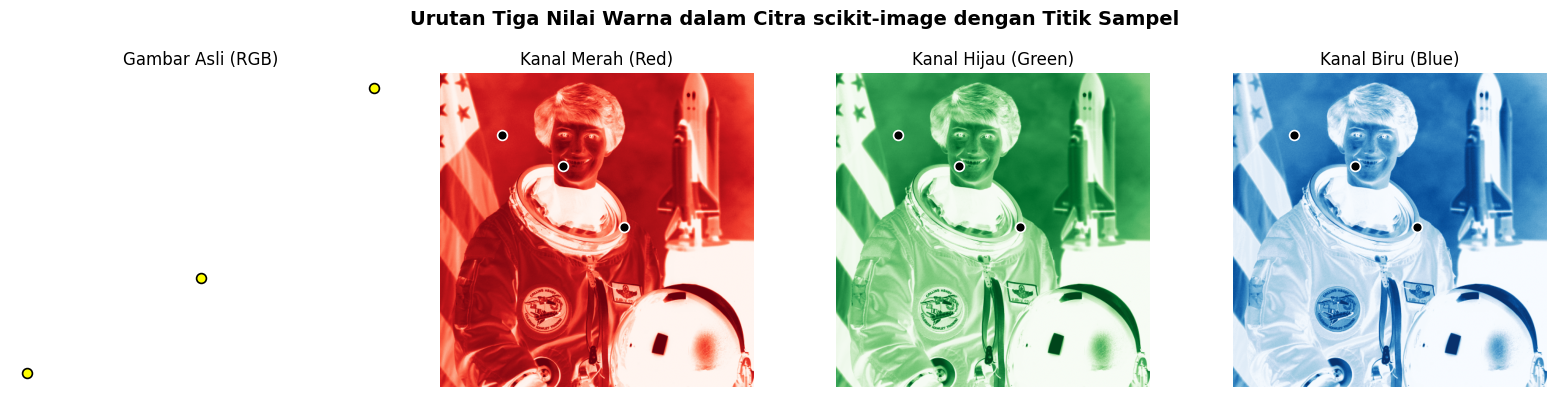

Nilai RGB pada titik koordinat yang dipilih:
Titik 1 - Koordinat (100, 100):
 Red	(Merah)	: 187
 Green (Hijau)	: 176
 Blue (Biru)	: 169
 RGB Triplet	: (187, 176, 169)

Titik 2 - Koordinat (200, 150):
 Red	(Merah)	: 236
 Green (Hijau)	: 210
 Blue (Biru)	: 184
 RGB Triplet	: (236, 210, 184)

Titik 3 - Koordinat (300, 250):
 Red	(Merah)	: 96
 Green (Hijau)	: 76
 Blue (Biru)	: 93
 RGB Triplet	: (96, 76, 93)



In [7]:
# Menjelaskan urutan tiga nilai warna dalam citra scikit-image dengan titik penanda koordinat piksel

# Memuat gambar RGB dari scikit-image
gambar_rgb = data.astronaut() # Gambar astronaut dalam format RGB
# Ekstrak tiga kanal warna (R, G, B)
red_channel = gambar_rgb[:, :, 0] # Kanal merah
green_channel = gambar_rgb[:, :, 1] # Kanal hijau
blue_channel = gambar_rgb[:, :, 2] # Kanal biru

# Koordinat tiga titik sampel untuk menampilkan nilai piksel RGB
titik_koordinat = [(100, 100), (200, 150), (300, 250)]

# Menampilkan gambar asli dan masing-masing kanal warna
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

# Tampilkan gambar asli dengan titik penanda 18: axes[0].imshow(gambar_rgb)
axes[0].set_title("Gambar Asli (RGB)")
for x, y in titik_koordinat:
  axes[0].scatter(x, y, color='yellow', s=50, edgecolors='black', linewidth=1.2) # Titik dengan outline hitam

# Tampilkan kanal merah dengan titik
axes[1].imshow(red_channel, cmap="Reds")
axes[1].set_title("Kanal Merah (Red)")
for x, y in titik_koordinat:
  axes[1].scatter(x, y, color='black', s=50, edgecolors='white', linewidth=1.2)

# Tampilkan kanal hijau dengan titik
axes[2].imshow(green_channel, cmap="Greens")
axes[2].set_title("Kanal Hijau (Green)")
for x, y in titik_koordinat:
  axes[2].scatter(x, y, color='black', s=50, edgecolors='white', linewidth=1.2)

# Tampilkan kanal biru dengan titik
axes[3].imshow(blue_channel, cmap="Blues")
axes[3].set_title("Kanal Biru (Blue)")
for x, y in titik_koordinat:
  axes[3].scatter(x, y, color='black', s=50, edgecolors='white', linewidth=1.2)

# Hilangkan sumbu koordinat
for ax in axes:
  ax.axis("off")

plt.suptitle("Urutan Tiga Nilai Warna dalam Citra scikit-image dengan Titik Sampel", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

# Menampilkan contoh nilai piksel untuk titik-titik yang dipilih
print("Nilai RGB pada titik koordinat yang dipilih:")
for i, (x, y) in enumerate(titik_koordinat):
  r_val, g_val, b_val = gambar_rgb[y, x, 0], gambar_rgb[y, x, 1], gambar_rgb[y, x, 2]
  print(f"Titik {i+1} - Koordinat ({x}, {y}):")
  print(f" Red	(Merah)	: {r_val}")
  print(f" Green (Hijau)	: {g_val}")
  print(f" Blue (Biru)	: {b_val}")
  print(f" RGB Triplet	: ({r_val}, {g_val}, {b_val})\n")


# Praktikum 7

<ipython-input-8-6a73b37113d9>:8: FutureWarning: The plugin infrastructure in `skimage.io` is deprecated since version 0.25 and will be removed in 0.27 (or later). To avoid this warning, please do not pass additional keyword arguments for plugins (`**plugin_args`). Instead, use `imageio` or other I/O packages directly. See also `skimage.io.imsave`.
  io.imsave("astronaut.jpg", gambar, quality=95)	# JPEG menggunakan parameter quality


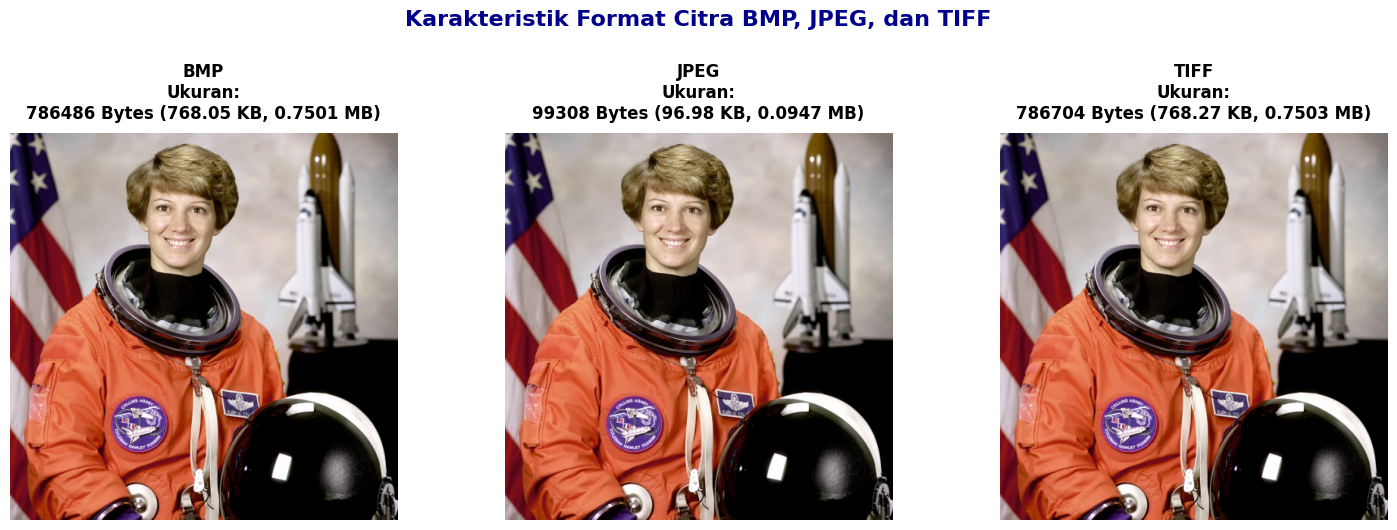


1. BMP (Bitmap):
- Format tidak terkompresi, menghasilkan ukuran file yang besar.
- Kualitas gambar sangat baik, tidak ada kehilangan data.
- Cocok untuk pengolahan citra yang memerlukan ketelitian tinggi.
- Ukuran file: 786486 Bytes (768.05 KB, 0.7501 MB)

2. JPEG (Joint Photographic Experts Group):
- Format terkompresi dengan metode lossy (menghilangkan sebagian data).
- Ukuran file lebih kecil dibanding BMP dan TIFF.
- Cocok untuk fotografi, media sosial, dan tampilan web.
- Ukuran file: 99308 Bytes (96.98 KB, 0.0947 MB)

3. TIFF (Tagged Image File Format):
- Format fleksibel yang mendukung kompresi lossy atau lossless.
- Digunakan dalam pencetakan profesional dan pemrosesan citra medis.
- Ukuran file bisa besar tergantung tingkat kompresi yang digunakan.
- Ukuran file: 786704 Bytes (768.27 KB, 0.7503 MB)


In [8]:
from skimage import io

# Membuat citra contoh dari skimage
gambar = data.astronaut()

# Simpan gambar dalam format BMP, JPEG, dan TIFF
io.imsave("astronaut.bmp", gambar)
io.imsave("astronaut.jpg", gambar, quality=95)	# JPEG menggunakan parameter quality
io.imsave("astronaut.tiff", gambar)

# Fungsi untuk menghitung ukuran file
import os

def ukuran_file(nama_file):
  size_bytes = os.path.getsize(nama_file)
  size_kb = size_bytes / 1024
  size_mb = size_kb / 1024
  return f"{size_bytes} Bytes ({size_kb:.2f} KB, {size_mb:.4f} MB)"

# Menampilkan informasi ukuran file dari masing-masing format
format_citra = ["BMP", "JPEG", "TIFF"]
nama_file = ["astronaut.bmp", "astronaut.jpg", "astronaut.tiff"]
ukuran = [ukuran_file(file) for file in nama_file]

# Tampilkan gambar dan informasi karakteristik format citra
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, fmt, file in zip(axes, format_citra, nama_file):
  img = io.imread(file)
  ax.imshow(img)
  ax.set_title(f"{fmt}\nUkuran:\n{ukuran_file(file)}", fontsize=12, fontweight="bold", color="black", pad=10)
  ax.axis("off")

plt.suptitle("Karakteristik Format Citra BMP, JPEG, dan TIFF", fontsize=16, fontweight="bold", color="darkblue", y=1.05)
plt.tight_layout()
plt.show()

# Menampilkan informasi karakteristik format citra 39: print("Karakteristik Format Citra:")
print("\n1. BMP (Bitmap):")
print("- Format tidak terkompresi, menghasilkan ukuran file yang besar.")
print("- Kualitas gambar sangat baik, tidak ada kehilangan data.")
print("- Cocok untuk pengolahan citra yang memerlukan ketelitian tinggi.")
print(f"- Ukuran file: {ukuran[0]}")

print("\n2. JPEG (Joint Photographic Experts Group):")
print("- Format terkompresi dengan metode lossy (menghilangkan sebagian data).")
print("- Ukuran file lebih kecil dibanding BMP dan TIFF.")
print("- Cocok untuk fotografi, media sosial, dan tampilan web.")
print(f"- Ukuran file: {ukuran[1]}")

print("\n3. TIFF (Tagged Image File Format):")
print("- Format fleksibel yang mendukung kompresi lossy atau lossless.")
print("- Digunakan dalam pencetakan profesional dan pemrosesan citra medis.")
print("- Ukuran file bisa besar tergantung tingkat kompresi yang digunakan.")
print(f"- Ukuran file: {ukuran[2]}")


# Praktikum 8

<ipython-input-9-ec4cc04840f3>:8: FutureWarning: The plugin infrastructure in `skimage.io` is deprecated since version 0.25 and will be removed in 0.27 (or later). To avoid this warning, please do not pass additional keyword arguments for plugins (`**plugin_args`). Instead, use `imageio` or other I/O packages directly. See also `skimage.io.imsave`.
  io.imsave(jpeg_quality_50, gambar, quality=50) # JPEG lossy dengan kualitas rendah
<ipython-input-9-ec4cc04840f3>:9: FutureWarning: The plugin infrastructure in `skimage.io` is deprecated since version 0.25 and will be removed in 0.27 (or later). To avoid this warning, please do not pass additional keyword arguments for plugins (`**plugin_args`). Instead, use `imageio` or other I/O packages directly. See also `skimage.io.imsave`.
  io.imsave(jpeg_quality_90, gambar, quality=90) # JPEG lossy dengan kualitas tinggi


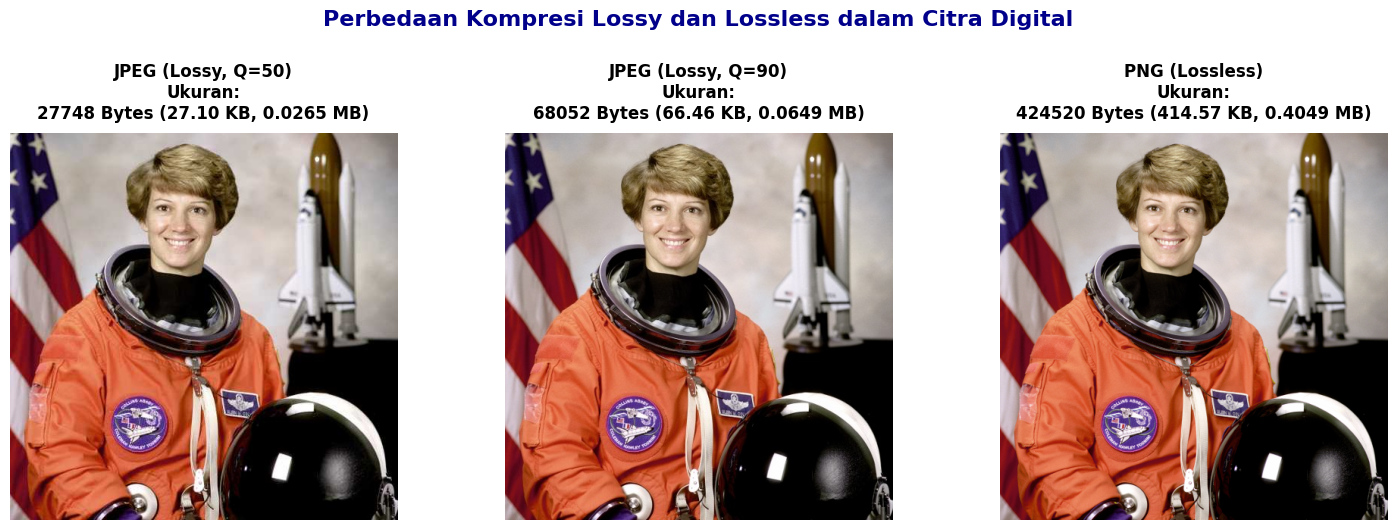

Perbedaan Kompresi Lossy dan Lossless:

1. JPEG (Lossy, Quality=50):
- Menggunakan kompresi lossy dengan kualitas rendah (Q=50).
- Detail gambar berkurang, muncul artefak kompresi.
- Ukuran file lebih kecil.
- Ukuran file: 27748 Bytes (27.10 KB, 0.0265 MB)

2. JPEG (Lossy, Quality=90):
- Menggunakan kompresi lossy dengan kualitas lebih tinggi (Q=90).
- Detail gambar masih cukup baik, artefak lebih sedikit.
- Ukuran file lebih besar dibanding Q=50, tetapi lebih kecil dibanding lossless.
- Ukuran file: 68052 Bytes (66.46 KB, 0.0649 MB)

3. PNG (Lossless):
- Menggunakan kompresi lossless, tidak ada kehilangan data.
- Detail gambar tetap sempurna seperti aslinya.
- Ukuran file lebih besar dibanding JPEG lossy.
- Ukuran file: 424520 Bytes (414.57 KB, 0.4049 MB)


In [9]:
# Menjelaskan perbedaan kompresi lossy dan lossless dalam citra digital

# Simpan gambar dalam format lossy (JPEG) dan lossless (PNG)
jpeg_quality_50 = "astronaut_lossy_50.jpg"
jpeg_quality_90 = "astronaut_lossy_90.jpg"
png_lossless = "astronaut_lossless.png"

io.imsave(jpeg_quality_50, gambar, quality=50) # JPEG lossy dengan kualitas rendah
io.imsave(jpeg_quality_90, gambar, quality=90) # JPEG lossy dengan kualitas tinggi
io.imsave(png_lossless, gambar) # PNG lossless

# Menampilkan ukuran file dari masing-masing format
nama_file_kompresi = [jpeg_quality_50, jpeg_quality_90, png_lossless]
ukuran_kompresi = [ukuran_file(file) for file in nama_file_kompresi]

# Menampilkan gambar hasil kompresi
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

kompresi_label = ["JPEG (Lossy, Q=50)", "JPEG (Lossy, Q=90)", "PNG (Lossless)"]

for ax, file, label in zip(axes, nama_file_kompresi, kompresi_label):
  img = io.imread(file)
  ax.imshow(img)
  ax.set_title(f"{label}\nUkuran:\n{ukuran_file(file)}", fontsize=12, fontweight="bold", color="black", pad=10)
  ax.axis("off")

plt.suptitle("Perbedaan Kompresi Lossy dan Lossless dalam Citra Digital", fontsize=16, fontweight="bold", color="darkblue", y=1.05)
plt.tight_layout()
plt.show()

# Menampilkan informasi perbedaan kompresi dalam teks
print("Perbedaan Kompresi Lossy dan Lossless:")

print("\n1. JPEG (Lossy, Quality=50):")
print("- Menggunakan kompresi lossy dengan kualitas rendah (Q=50).")
print("- Detail gambar berkurang, muncul artefak kompresi.")
print("- Ukuran file lebih kecil.")
print(f"- Ukuran file: {ukuran_kompresi[0]}")

print("\n2. JPEG (Lossy, Quality=90):")
print("- Menggunakan kompresi lossy dengan kualitas lebih tinggi (Q=90).")
print("- Detail gambar masih cukup baik, artefak lebih sedikit.")
print("- Ukuran file lebih besar dibanding Q=50, tetapi lebih kecil dibanding lossless.")
print(f"- Ukuran file: {ukuran_kompresi[1]}")

print("\n3. PNG (Lossless):")
print("- Menggunakan kompresi lossless, tidak ada kehilangan data.")
print("- Detail gambar tetap sempurna seperti aslinya.")
print("- Ukuran file lebih besar dibanding JPEG lossy.")
print(f"- Ukuran file: {ukuran_kompresi[2]}")
